## INF397(27705) - Assignment 1 -- Sifan Guo (sg46829)
### Question 1. Interaction Effects in a Linear Regression
#### a) 
![](1a.JPG)

#### b) 

![](1b.JPG)

#### c) 
![](1c.JPG)

#### d)
As far as I'm concerned, the word "main" of "main effects" explain itself. Because the main effects are the independent variables, in other words, they're what we can observe/get from the real word, the "interaction(X1*X2)" would be less meaningful without these main effects. In addition, if the "interaction(X1*X2)" is highly related to the response(income), then it doesn't matter whether the coefficients of X1 and X2 are zero.

### Question 2. This question involves the use of multiple linear regression on the provided dataset

#### a) scatterplot matrix


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f124a5de5f8>,
      dtype=object)

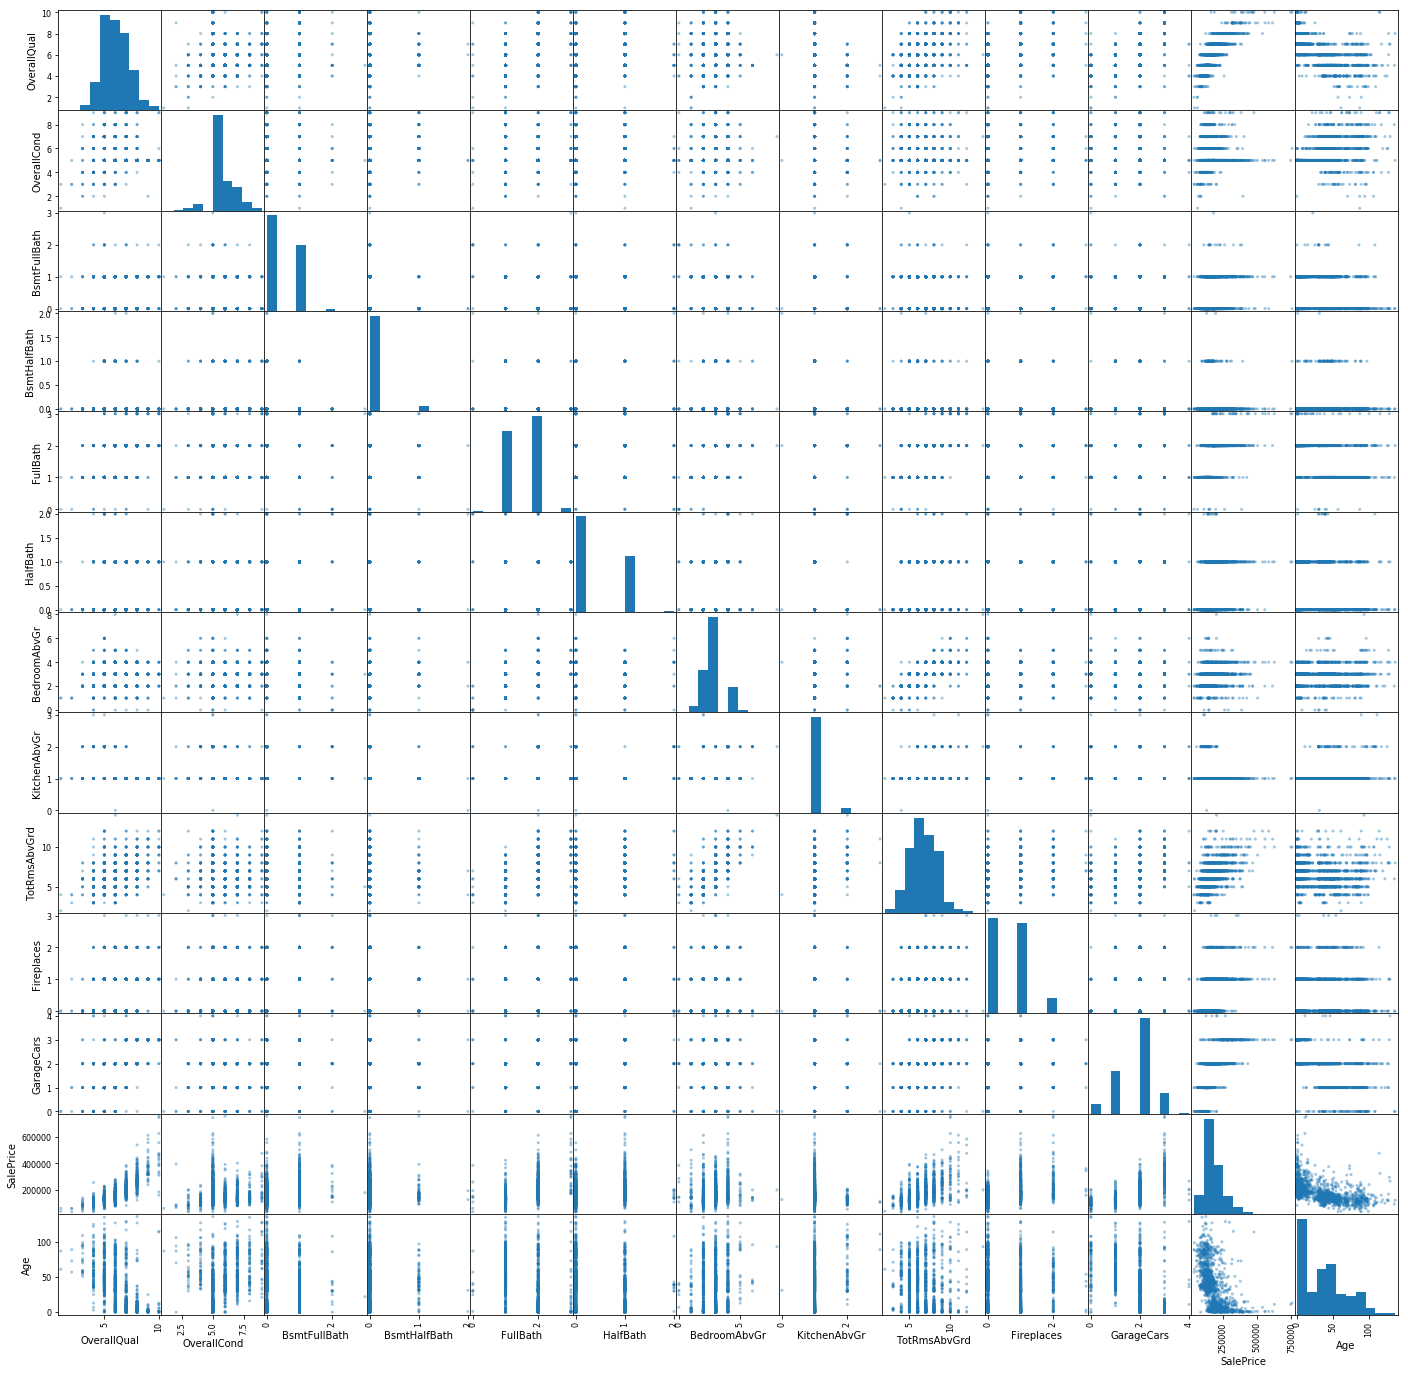

In [1]:
import pandas as pd

%matplotlib inline

# load dataset
data = pd.read_csv("austin_house_price.csv")
pd.plotting.scatter_matrix(data, alpha=0.42,figsize=(24,24))

#### (b) Compute the matrix of correlations between the variables using the function. 

In [2]:
# Calculate the matrix of Correlations using corr() function
correlations = data.corr()

# print it out
print(correlations)

              OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
OverallQual      1.000000    -0.091932      0.111098     -0.040150  0.550600   
OverallCond     -0.091932     1.000000     -0.054942      0.117821 -0.194149   
BsmtFullBath     0.111098    -0.054942      1.000000     -0.147871 -0.064512   
BsmtHalfBath    -0.040150     0.117821     -0.147871      1.000000 -0.054536   
FullBath         0.550600    -0.194149     -0.064512     -0.054536  1.000000   
HalfBath         0.273458    -0.060769     -0.030905     -0.012340  0.136381   
BedroomAbvGr     0.101676     0.012980     -0.150673      0.046519  0.363252   
KitchenAbvGr    -0.183882    -0.087001     -0.041503     -0.037944  0.133115   
TotRmsAbvGrd     0.427452    -0.057583     -0.053275     -0.023836  0.554784   
Fireplaces       0.396765    -0.023820      0.137928      0.028976  0.243671   
GarageCars       0.600671    -0.185758      0.131881     -0.020891  0.469672   
SalePrice        0.790982    -0.077856  

#### (c) Use Python/R (sklearn in python and lm() function in R) to perform a multiple linear regression with SalePrice as the response and all other variables as the predictors. you can use all or less variables if you think it can improve the model.
- Is there a relationship between the predictors and the response?
- What does the coefficient for the age variable suggest?

In [3]:
from sklearn import linear_model
import numpy as np

y = data['SalePrice']      # the response 
X = data.drop('SalePrice',axis=1) # the 12 predictors

n = y.size
print("The size of y is :", n)
print("The shape of X is :", X.shape)

# initialize the linear regression model
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)  # train the model
y_prediction = lr_model.predict(X)  # predict the results

y_mean = y.mean()
print("This is the mean of SalePrice: ", y_mean)

RSS = 0
for index, every_y in enumerate(y):
    current_error = (every_y - y_prediction[index])**2
    RSS += current_error
    
print("This is the RSS: ", RSS)


TSS = 0
for index, every_y in enumerate(y):
    current_error = (y_mean - y_prediction[index])**2
    TSS += current_error

print("This is the TSS: ", TSS)


RSE = (RSS / (n - 2)) ** 0.5
print("This is the RSE: ", RSE)

R_squared = (TSS - RSS) / TSS 
print("This is the R squared: ", R_squared)


# print(y.mean())
# print(y_prediction.mean())
# # print(y)
# print(y_prediction)

The size of y is : 1460
The shape of X is : (1460, 12)
This is the mean of SalePrice:  180921.19589041095
This is the RSS:  2238470569090.5713
This is the TSS:  6969440765519.383
This is the RSE:  39182.93217189721
This is the R squared:  0.6788163291142121


In [4]:
X_col_names = X.columns
coefs = lr_model.coef_


print(X_col_names)
print('coefficients of the model:',coefs)

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'Age'],
      dtype='object')
coefficients of the model: [ 23140.5775519    4340.81716369  21740.62927048  10236.97404143
  13417.13566671    239.55779176  -9599.11967007 -30303.00735859
  15129.23175193  12668.63436142  16766.93704285   -248.83374056]


#### My comment:
Even though the RSE seems to be quiet large (39183), the mean of SalePrice is 180921 which accounts for the large absolute value of RSE. However, the R-squared value is about 0.68 which means more than 2/3 of the variability in SalePrice is explained by this multiple linear regression. So, I believe that there is a relationship between the predictors and the response.

The coefficient for the age variable(-248.8) means that when we *increase/decrease* the age varible by 1 unit, the SalePrice will *decrease/increase* by 248.8 unit. Moreover, the coefficient for the age variable is -248.8 which is comparatively small. It indicates that the Age variable might have less to do with the Sale Price, however, we didn't do normalization for these predictors. As I inspect the data, the values of Age variable are relative larger than other variables, so it's possible that Age variable is as responsible as other variables for the Sale Price.

#### (d) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings
Here I'll try the log(X) and X Square.

In [5]:
X_2 = X.apply(np.square)

# initialize the linear regression model
lr_model_square = linear_model.LinearRegression()
lr_model_square.fit(X_2, y)  # train the model
y_prediction_square = lr_model_square.predict(X_2)  # predict the results


y_mean = y.mean()
print("This is the mean of SalePrice: ", y_mean)

RSS2 = 0
for index, every_y in enumerate(y):
    current_error = (every_y - y_prediction_square[index])**2
    RSS2 += current_error
    
print("This is the RSS: ", RSS2)


TSS2 = 0
for index, every_y in enumerate(y):
    current_error = (y_mean - y_prediction_square[index])**2
    TSS2 += current_error

print("This is the TSS: ", TSS2)


RSE2 = (RSS2 / (n - 2)) ** 0.5
print("This is the RSE: ", RSE2)

R_squared2 = (TSS2 - RSS2) / TSS2
print("This is the R squared: ", R_squared2)

This is the mean of SalePrice:  180921.19589041095
This is the RSS:  1927234542900.6987
This is the TSS:  7280676791706.355
This is the RSE:  36357.04046762147
This is the R squared:  0.7352945889458969


##### My Comment:

    When I tried log 10, I got the ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
    So, I turn to X square root.

In [6]:
X_log10 = X.apply(np.log10)
lr_model_log10 = linear_model.LinearRegression()
# lr_model_log10.fit(X_log10, y)  # train the model
# y_prediction_log10 = lr_model_sqrt.predict(X_log10)

In [7]:
X_sqrt = X.apply(np.sqrt)


# initialize the linear regression model
lr_model_sqrt = linear_model.LinearRegression()
lr_model_sqrt.fit(X_sqrt, y)  # train the model
y_prediction_sqrt = lr_model_sqrt.predict(X_sqrt)  # predict the results


print("This is the mean of SalePrice: ", y_mean)

RSS3 = 0
for index, every_y in enumerate(y):
    current_error = (every_y - y_prediction_sqrt[index])**2
    RSS3 += current_error
    
print("This is the RSS: ", RSS3)


TSS3 = 0
for index, every_y in enumerate(y):
    current_error = (y_mean - y_prediction_sqrt[index])**2
    TSS3 += current_error

print("This is the TSS: ", TSS3)


RSE3 = (RSS3 / (n - 2)) ** 0.5
print("This is the RSE: ", RSE3)

R_squared3 = (TSS3 - RSS3) / TSS3 
print("This is the R squared: ", R_squared3)

This is the mean of SalePrice:  180921.19589041095
This is the RSS:  2522073785117.5435
This is the TSS:  6685837549492.399
This is the RSE:  41591.07369276949
This is the R squared:  0.62277369642207


##### My Comment:
As we can see from the 3 different RSE, when we square the X variables, the RSE decrease from 39182 to 36357. When we use the square root of X variables, the RSE increase from 39182 to 41591. This is weird from the first sight, because normally when you square some numbers, you get bigger number which gets you bigger RSE (the absolute value). But I find that it might be due to the change of coefficients. What's more, the R-squared values are changing which means some transformation can influence the results.

### Question 3. In this exercise I'll create some simulated data and will fit simple linear regression models to it. Make sure to set seed prior to starting to ensure consistent results.
a) Create a vector, x, containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X

b) Create another vector, eps, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal distribution with mean zero and variance 0.25

c) Using x and eps, generate a vector y according to the model Y =−1+0.5X+ε
- What is the length of the vector y? 
- What are the values of β0 and β1 in this linear model?

#### My Answer: The length is 100 because there are 100 observations in total. And the β0 is -1 and β1 is 0.5.

In [8]:
# set the random seed
np.random.seed(seed=42)

# generate the random vector X from a N (0, 1) distribution
X_random = np.random.normal(0,1, 100)

eps = np.random.normal(0, 0.25, 100)
print("Here is the X:\n ", X_random)
print("Here is the eps:\n ", eps)

y_random = -1 + 0.5 * X_random + eps
print("Here is the y:\n", y_random)

Here is the X:
  [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.219671

d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

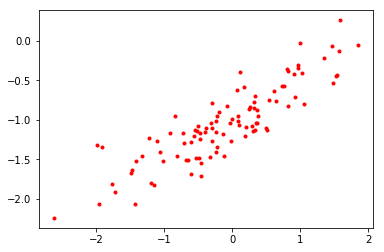

In [9]:
import matplotlib.pyplot as plt
plt.plot(X_random, y_random, "r.")

##### Observation:
It looks like a thick line, which indicates that there might be linear relationship between X and y.

e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [10]:
# initialize the linear regression model
lr_model_random = linear_model.LinearRegression()
lr_model_random.fit(X_random.reshape(-1, 1), y_random)  # train the model
y_prediction_random = lr_model_random.predict(X_random.reshape(-1, 1))  # predict the results

print('β^0:',lr_model_random.intercept_)
print('β^1:',lr_model_random.coef_[0])

β^0: -0.9981430425340083
β^1: 0.4641857099321393


##### They're very close to the β0( -1) and β1 (0.5).

f) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [11]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X_random.reshape(-1, 1))
lr_model_random2 = lr_model_random.fit(X_poly,y_random)
y_prediction_random2 = lr_model_random.predict(X_poly)

print('β^0:',lr_model_random2.intercept_)
print('β^1 for X:',lr_model_random2.coef_[0])
print('β^2 for X^2:',lr_model_random2.coef_[1])

β^0: -1.0345352870115674
β^1 for X: 0.4810641755031238
β^2 for X^2: 0.046107487189157206


In [12]:
y_random_mean = y_random.mean()
print("This is the mean of y_random: ", y_random_mean)

RSS = 0
for index, every_y in enumerate(y_random):
    current_error = (every_y - y_prediction_random[index])**2
    RSS += current_error
    
print("This is the RSS for Linear Regression: ", RSS)


TSS = 0
for index, every_y in enumerate(y_random):
    current_error = (y_mean - y_prediction_random[index])**2
    TSS += current_error

print("This is the TSS for Linear Regression: ", TSS)


RSE = (RSS / (n - 2)) ** 0.5
print("This is the RSE for Linear Regression: ", RSE)

R_squared = (TSS - RSS) / TSS 
print("This is the R squared for Linear Regression: ", R_squared)

This is the mean of y_random:  -1.046347111934566
This is the RSS for Linear Regression:  5.522703014320554
This is the TSS for Linear Regression:  3273285773642.885
This is the RSE for Linear Regression:  0.0615456103206374
This is the R squared for Linear Regression:  0.9999999999983129


In [17]:
RSS = 0
for index, every_y in enumerate(y_random):
    current_error = (every_y - y_prediction_random2[index])**2
    RSS += current_error
    
print("This is the RSS for Polynomial Regression: ", RSS)

TSS = 0
for index, every_y in enumerate(y_random):
    current_error = (y_mean - y_prediction_random2[index])**2
    TSS += current_error

print("This is the TSS for Polynomial Regression: ", TSS)


RSE = (RSS / (n - 2)) ** 0.5
print("This is the RSE for Polynomial Regression: ", RSE)

R_squared = (TSS - RSS) / TSS 
print("This is the R squared for Polynomial Regression: ", R_squared)

This is the RSS for Polynomial Regression:  0.9738736466637337
This is the TSS for Polynomial Regression:  3273285773643.141
This is the RSE for Polynomial Regression:  0.02584476246133721
This is the R squared for Polynomial Regression:  0.9999999999997026


##### The quadratic term doesn't improve the model fit because the RSE is decreasing and R-Squared value is increasing. The result means that the Polynomial model fits the better. However, because the values of X are so small that there are only minor differences between them. 

(g) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in Describe your results

##### I change the error term  ε from (0, 0.25) to (0, 0.1)

In [18]:

# set the random seed
np.random.seed(seed=42)

# generate the random vector X from a N (0, 1) distribution
X_random = np.random.normal(0,1, 100)


eps = np.random.normal(0, 0.1, 100)
print("Here is the X:\n ", X_random)
print("Here is the eps:\n ", eps)

y_random = -1 + 0.5 * X_random + eps
print("Here is the y:\n", y_random)

Here is the X:
  [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.219671

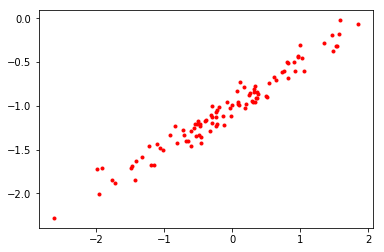

In [19]:
plt.plot(X_random, y_random, "r.")

##### Observation: The x-y plot looks more like a line.

In [20]:
# initialize the linear regression model
lr_model_random = linear_model.LinearRegression()
lr_model_random.fit(X_random.reshape(-1, 1), y_random)  # train the model
y_prediction_random = lr_model_random.predict(X_random.reshape(-1, 1))  # predict the results

print('β^0:',lr_model_random.intercept_)
print('β^1:',lr_model_random.coef_[0])

y_random_mean = y_random.mean()
print("This is the mean of y_random: ", y_random_mean)

RSS = 0
for index, every_y in enumerate(y_random):
    current_error = (every_y - y_prediction_random[index])**2
    RSS += current_error
    
print("This is the RSS for Linear Regression: ", RSS)


TSS = 0
for index, every_y in enumerate(y_random):
    current_error = (y_mean - y_prediction_random[index])**2
    TSS += current_error

print("This is the TSS for Linear Regression: ", TSS)


RSE = (RSS / (n - 2)) ** 0.5
print("This is the RSE for Linear Regression: ", RSE)

R_squared = (TSS - RSS) / TSS 
print("This is the R squared for Linear Regression: ", R_squared)

β^0: -0.9992572170136035
β^1: 0.4856742839728558
This is the mean of y_random:  -1.0496927999920547
This is the RSS for Linear Regression:  0.883632482291289
This is the TSS for Linear Regression:  3273285894706.4297
This is the RSE for Linear Regression:  0.024618244128254967
This is the R squared for Linear Regression:  0.99999999999973


In [22]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X_random.reshape(-1, 1))
lr_model_random2 = lr_model_random.fit(X_poly,y_random)
y_prediction_random2 = lr_model_random.predict(X_poly)

print('β^0:',lr_model_random2.intercept_)
print('β^1 for X:',lr_model_random2.coef_[0])
print('β^2 for X^2:',lr_model_random2.coef_[1])
y_random_mean = y_random.mean()
print("This is the mean of y_random: ", y_random_mean)

RSS = 0
for index, every_y in enumerate(y_random):
    current_error = (every_y - y_prediction_random2[index])**2
    RSS += current_error
    
print("This is the RSS for Polynomial Regression: ", RSS)


TSS = 0
for index, every_y in enumerate(y_random):
    current_error = (y_mean - y_prediction_random2[index])**2
    TSS += current_error

print("This is the TSS for Polynomial Regression: ", TSS)


RSE = (RSS / (n - 2)) ** 0.5
print("This is the RSE for Polynomial Regression: ", RSE)

R_squared = (TSS - RSS) / TSS 
print("This is the R squared for Polynomial Regression: ", R_squared)

β^0: -1.0138141148046271
β^1 for X: 0.49242567020124955
β^2 for X^2: 0.01844299487566287
This is the mean of y_random:  -1.0496927999920547
This is the RSS for Polynomial Regression:  0.8424979467175099
This is the TSS for Polynomial Regression:  3273285894706.469
This is the RSE for Polynomial Regression:  0.02403840586637083
This is the R squared for Polynomial Regression:  0.9999999999997427


##### Observation: The Linear Regression model works better than before as as there is a larger R-Squared Value and a smaller RSE value. However, there is no improve in Polynomial Regression. Also, the Linear Regression model fits better than Polynomial Regression model this time. After all, the simulated function is linear function, so that makes sense when we have only a few errors in the data.